In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
import numpy as np
from mplsoccer import Pitch, FontManager
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patheffects as path_effects
fm = FontManager()
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]
from matplotlib.font_manager import FontProperties

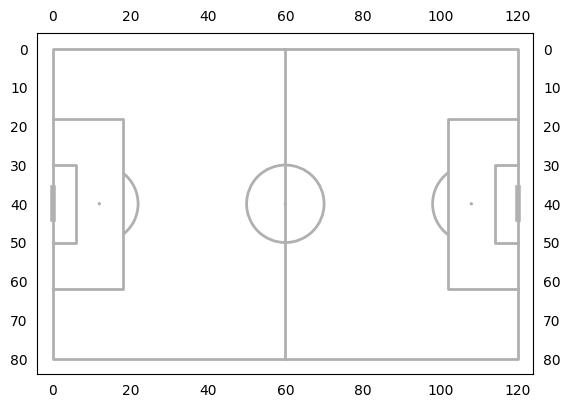

In [194]:
fig, ax = plt.subplots()
pitch = Pitch(pitch_type='statsbomb', axis=True, label=True)
pitch.draw(ax=ax)

In [114]:
zone_areas = {
    'zone_1':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'area':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_3':{
        'x_lower_bound': 0, 'x_upper_bound': 17,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'zone_4':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 78.9, 'y_upper_bound': 100,
    },
    'zone_5':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9,
    },
    'zone_6':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 0, 'y_upper_bound': 21.1,
    },
    'resto':{
        'x_lower_bound': 33.5, 'x_upper_bound': 100,
        'y_lower_bound': 0, 'y_upper_bound': 100,
    },
    'tercio':{
        'x_lower_bound': 17, 'x_upper_bound': 33.5,
        'y_lower_bound': 0, 'y_upper_bound': 100,
    }
}

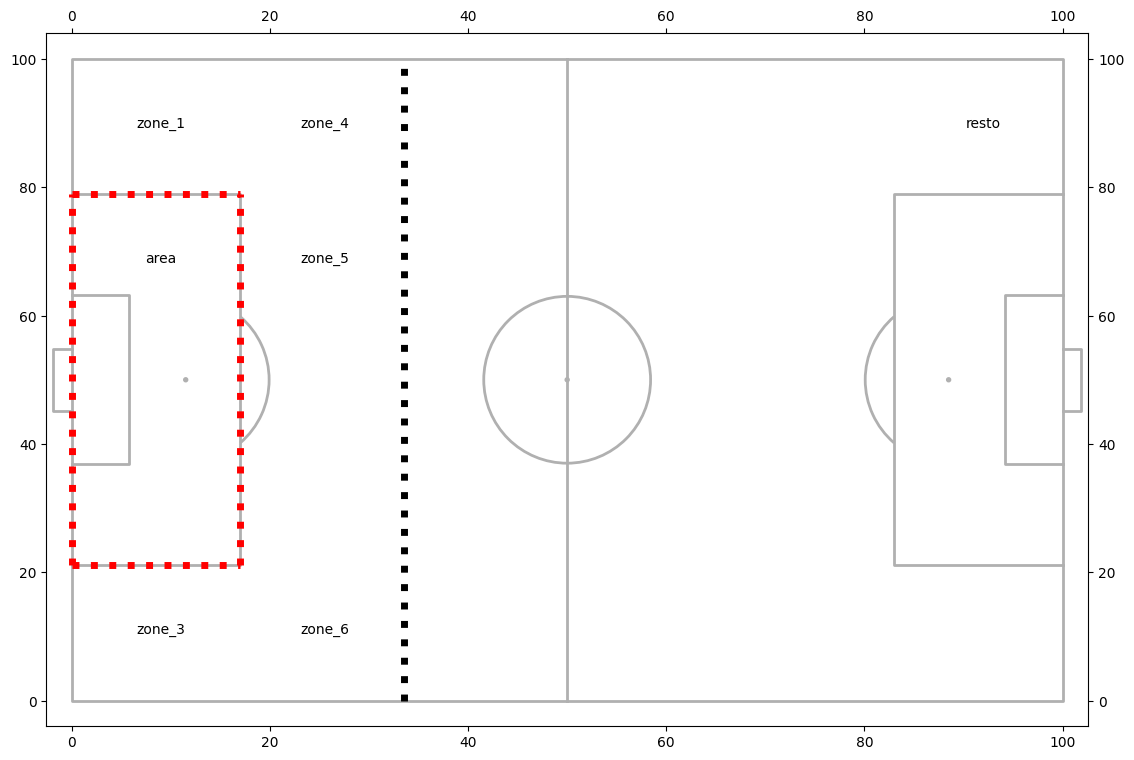

In [84]:
fig = plt.figure(figsize = (16,9), dpi = 100)
ax = plt.subplot(111)
pitch = Pitch(
    pitch_type='opta',
    axis=True, 
    label=True, 
    tick=True,
    goal_type='box'
)
pitch.draw(ax = ax)

for zone in zone_areas.keys():
    ax.text(x=zone_areas[zone]['x_upper_bound'] - 8, 
            y=zone_areas[zone]['y_upper_bound'] - 10,
            s=zone, ha='center',va='center')

ax.plot([zone_areas['area']['x_upper_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_lower_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_upper_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_lower_bound']], ls=':', lw=5, color='red')

ax.plot([33.5, 33.5], [0, 100], ls=':', lw=5, color='black')



In [179]:
eventos = pd.read_csv('C:/Users/federab/Documents/LanusStats/Python/Twitch_YouTube/archivos/premierEventos15-16.csv')

C:\Users\federab\AppData\Local\Temp\ipykernel_117896\1975899402.py:1: DtypeWarning: Columns (10,12,17,18,19,20,23,28,37,45,46,52,73,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  eventos = pd.read_csv('C:/Users/federab/Documents/LanusStats/Python/Twitch_YouTube/archivos/premierEventos15-16.csv')


In [180]:
saques_arco = eventos[eventos['pass_type'] == 'Goal Kick'][['team', 'pass_end_location']].reset_index(drop=True)

In [181]:
saques_arco

,team,pass_end_location
0,AFC Bournemouth,"[26.6, 13.6]"
1,Leicester City,"[97.4, 54.1]"
2,AFC Bournemouth,"[12.9, 29.0]"
3,AFC Bournemouth,"[74.9, 26.5]"
4,Leicester City,"[88.4, 56.2]"
...,...,...
6336,Swansea City,"[14.4, 47.6]"
6337,Chelsea,"[63.1, 79.7]"
6338,Swansea City,"[84.4, 51.2]"
6339,Swansea City,"[35.7, 26.3]"


In [59]:
saques_arco['len'] = saques_arco.pass_end_location.apply(len)

In [182]:
def separar_x(string):
    x = string.split(',')[0].replace('[','')
    return x

def separar_y(string):
    y = string.split(',')[1].replace(']','')
    return y

saques_arco['x'] = saques_arco.pass_end_location.apply(separar_x).astype(float)
saques_arco['y'] = saques_arco.pass_end_location.apply(separar_y).astype(float)


In [187]:
saques_arco[['x', 'y']].describe()

,x,y
count,6341.000000,6341.000000
mean,52.513592,54.036370
std,18.061721,28.840909
min,2.772000,0.125000
25%,48.216000,28.125000
50%,58.044000,59.500000
75%,63.504000,78.875000
max,100.800000,100.000000


In [184]:
lista_eq = list(saques_arco.team.unique())

In [185]:
def assign_shot_zone(x,y):
    '''
    This function returns the zone based on the x & y coordinates of the shot
    taken.
    Args:
        - x (float): the x position of the shot based on a vertical grid.
        - y (float): the y position of the shot based on a vertical grid.
    '''

    global zone_areas

    # Conditions

    for zone in zone_areas:
        if (x >= zone_areas[zone]['x_lower_bound']) & (x <= zone_areas[zone]['x_upper_bound']):
            if (y >= zone_areas[zone]['y_lower_bound']) & (y <= zone_areas[zone]['y_upper_bound']):
                return zone

In [186]:
saques_arco['x'] = saques_arco['x'] * .84
saques_arco['y'] = saques_arco['y'] * 1.25

In [188]:
saques_arco['zone_area'] = [assign_shot_zone(x,y) for x,y in zip(saques_arco['x'], saques_arco['y'])]
saques_arco.zone_area.value_counts()

zone_area
resto     5226
zone_5     386
area       242
zone_3     143
zone_1     137
zone_4     104
zone_6     100
Name: count, dtype: int64

In [189]:
saques_arco['zone_area'] = np.where(saques_arco['zone_area'].isin(['zone_1', 'zone_3', 'zone_4', 'zone_5', 'zone_6']), 'tercio', saques_arco['zone_area'])

In [195]:
saques_arco.zone_area.value_counts()

zone_area
resto     5226
tercio     870
area       242
Name: count, dtype: int64

In [190]:
data = saques_arco.groupby(['team', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()
data.rename(columns={0:'count'}, inplace=True)
total = data.groupby('team')['count'].sum().reset_index()
total.rename(columns={'count':'total'}, inplace=True)
df_plot = pd.merge(data, total, on='team')
df_plot['pct_goal_kicks'] = df_plot['count'] / df_plot['total']
df_plot_copy = df_plot[df_plot['zone_area'] == 'tercio'].copy()
df_plot_copy2 = df_plot[df_plot['zone_area'] == 'tercio'].copy()
df_plot_copy['zone_area'] = 'zone_1'
df_plot_copy2['zone_area'] = 'zone_3'
df_plot = pd.concat([df_plot, df_plot_copy, df_plot_copy2])

C:\Users\federab\AppData\Local\Temp\ipykernel_117896\380379802.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = saques_arco.groupby(['team', 'zone_area']).apply(lambda x: x.shape[0]).reset_index()


Text(0.03, 0.899, 'Zonas y porcentajes sobre donde terminaron los saques de arco de los equipos. Premier League 15/16')

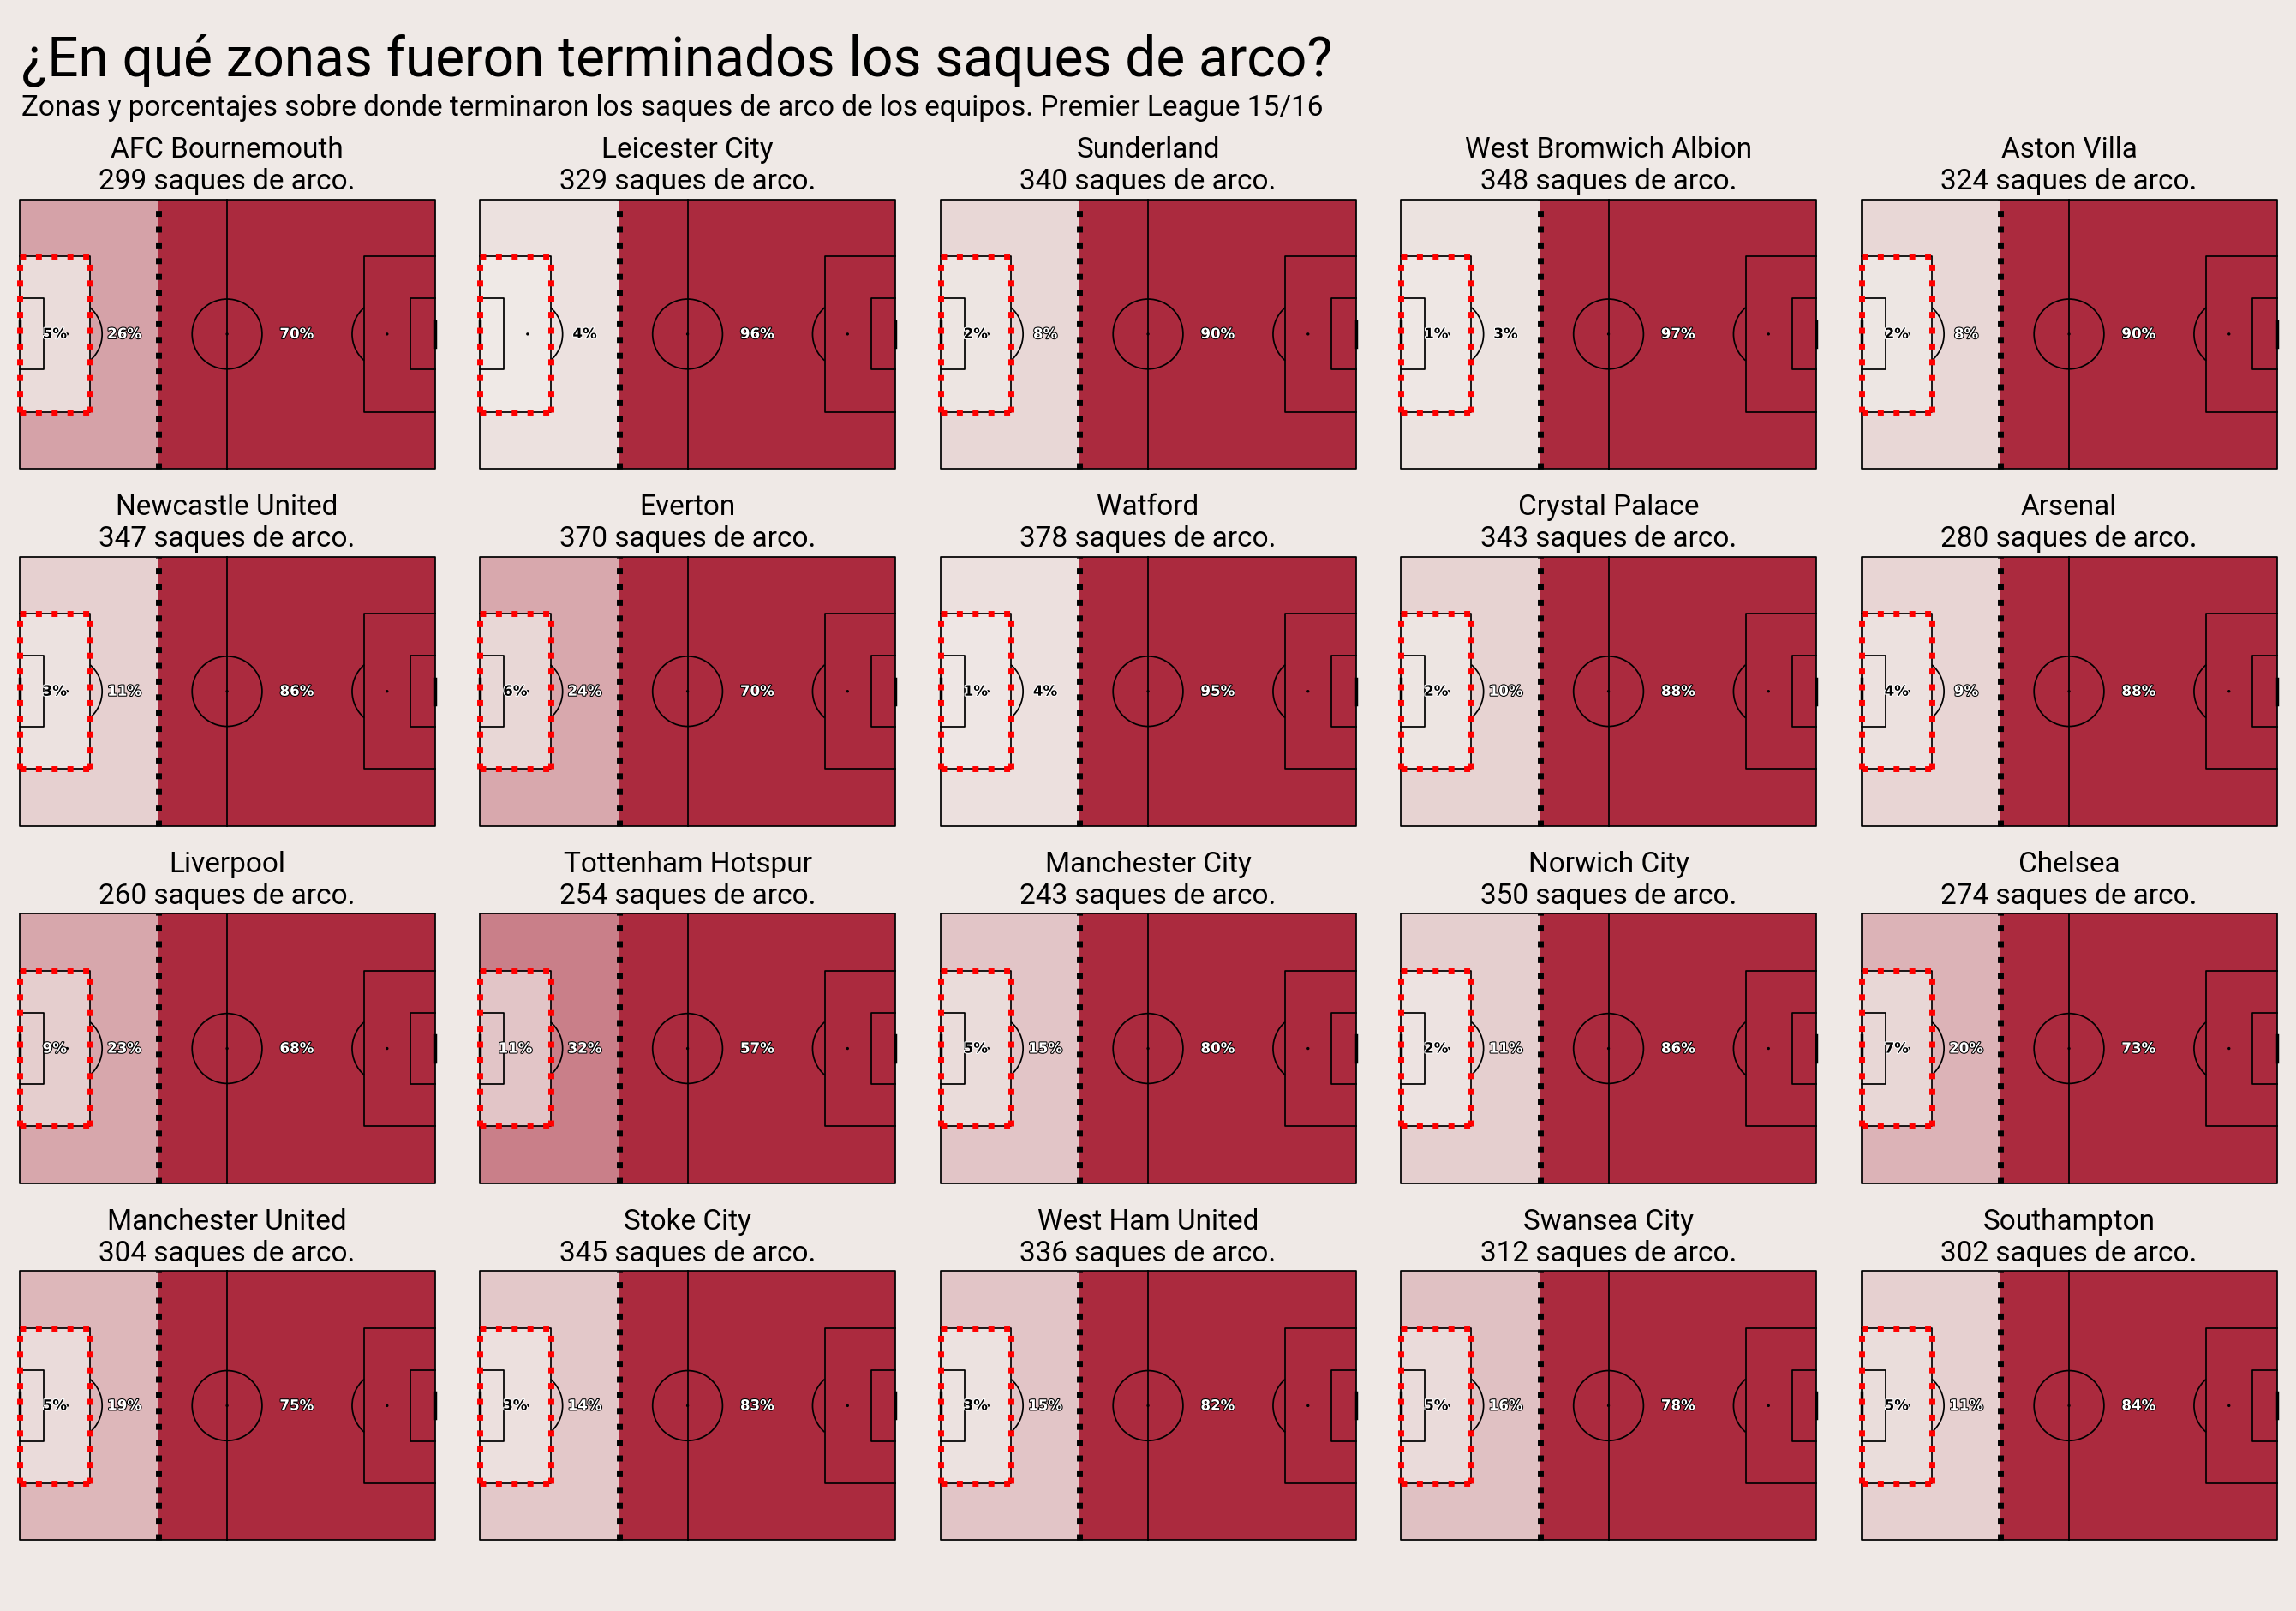

In [191]:
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20, pitch_type='opta', linewidth=1.25)

GRID_HEIGHT = 0.82
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
facecolor = "#EFE9E6"
fig.set_facecolor(facecolor)

for i, ax in enumerate(axs['pitch'].flat[:len(lista_eq)]):
    ax.set_facecolor(facecolor)
    ax.plot([33.5, 33.5], [0, 100], ls=':', lw=5, color='black')
    ax.plot([zone_areas['area']['x_upper_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
    ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_lower_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
    ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_upper_bound'], zone_areas['area']['y_upper_bound']], ls=':', lw=5, color='red')
    ax.plot([zone_areas['area']['x_lower_bound'], zone_areas['area']['x_upper_bound']], [zone_areas['area']['y_lower_bound'], zone_areas['area']['y_lower_bound']], ls=':', lw=5, color='red')

    plot_df = df_plot[df_plot['team'] == lista_eq[i]]
    max_value = plot_df['pct_goal_kicks'].max()
    
    for zone in plot_df['zone_area']:
        shot_pct = plot_df[plot_df['zone_area'] == zone]['pct_goal_kicks'].iloc[0]
        x_lim = [zone_areas[zone]['x_lower_bound'], zone_areas[zone]['x_upper_bound']]
        y1 = zone_areas[zone]['y_lower_bound']
        y2 = zone_areas[zone]['y_upper_bound']
        ax.fill_between(
            x=x_lim, 
            y1=y1, y2=y2, 
            color='#ab2a3e', alpha=(shot_pct/max_value),
            zorder=0, ec='None')
        if shot_pct > 0.075:
                color_text = 'white'
                fore_color ='black'
        else:
                color_text = 'black'
                fore_color = 'white'
        if shot_pct >= 0 and (zone != 'zone_1' and zone != 'zone_3'):
            x_pos = x_lim[0] + abs(x_lim[0] - x_lim[1])/2
            y_pos = y1 + abs(y1 - y2)/2
            text_ = ax.annotate(
                xy=(x_pos, y_pos),
                text=f'{shot_pct:.0%}',
                ha='center',
                va='center',
                color=color_text,
                weight='bold',
                size=12
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.5, foreground=fore_color), path_effects.Normal()]
            )
    
    ax.text(50, 112.5, f"{lista_eq[i]}\n{df_plot[df_plot['team'] == lista_eq[i]]['total'].values[0]} saques de arco.",
            ha='center', va='center', fontsize=24,
            fontproperties=fm.prop)
    
    # -- Transformation functions
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # -- Take df_plot coordinates and transform them to normalized figure coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((12,101))
    ax_size = 0.1

fig.text(
    x=0.03, y=.919,
    s='¿En qué zonas fueron terminados los saques de arco?',
    ha='left',
    va='bottom',
    size=46,
    fontproperties = fm.prop
)
fig.text(
    x=0.03, y=.899,
    s='Zonas y porcentajes sobre donde terminaron los saques de arco de los equipos. Premier League 15/16',
    ha='left',
    va='bottom',
    weight='bold',
    size=24,
    fontproperties = fm.prop
)

#plt.savefig('imagen.png', dpi=300, bbox_inches='tight')